In [1]:
from scipy import integrate
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
f = lambda x : (2/np.sqrt(np.pi))*np.e**(-x**2)

a) Find the value of the integral for a = 1.5 with scipy.integrate.quad and use this as 
the exact value of the integral.

In [ ]:
exact, e = integrate.quad(f, 0, 1.5)
print(f"Exact integral: {exact}")

Exact integral: 0.966105146475311


b) Plot 𝑒𝑟𝑟𝑓(𝑎) for a ∈ [−2,2 ].

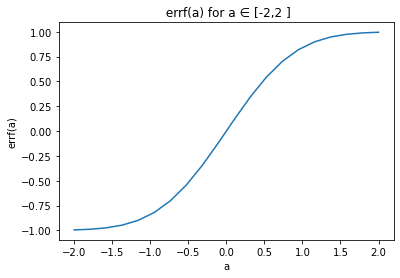

In [ ]:
errf = lambda a: integrate.quad(f, 0, a)[0]

x = np.linspace(-2,2,20)
y = list(map(errf, x))

plt.plot(x, y)
plt.xlabel('a')
plt.ylabel('errf(a)')
plt.title(' errf(a) for a ∈ [-2,2 ]')
plt.show()

c) Evaluate the integral using the Gauss integration scheme with 2, 3, 4 and 5
integration points. Calculate the relative error in each case.


In [ ]:
def gaussquad(n):
    """
    Calculate Gauss quadrature nodes and weights.

    Parameters:
    n : int
        The number of quadrature points.
    
    Returns:
    x : ndarray
        The quadrature nodes.
    w : ndarray
        The quadrature weights.
    """
    b = np.zeros(n-1)
    for i in range(np.size(b)):
        b[i] = (i + 1) / np.sqrt(4 * (i + 1) * (i + 1) - 1)
    
    J = np.diag(b, -1) + np.diag(b, 1)
    x, ev = eigh(J)
    w = 2 * ev[0]**2
    return x, w


In [ ]:
def quad_gauss(f, a, b, deg):
    """
    Numerical integration using Gauss quadrature.

    Parameters:
    f : function
        The function to integrate, handle to y = f(x).
    a : float
        The lower bound of the integration interval.
    b : float
        The upper bound of the integration interval.
    deg : int
        The degree of the polynomial (number of Gauss points).
    
    Returns:
    result : float
        The integral of the function over [a, b].
    """
    # Get Gauss points for [-1, 1]
    gx, w = gaussquad(deg)
    
    # Transform to [a, b]
    x = 0.5 * (b - a) * gx + 0.5 * (a + b)
    y = f(x)
    
    # Return the integral approximation
    return 0.5 * (b - a) * np.dot(w, y)

In [ ]:
nodes = [2, 3, 4, 5]

results = [quad_gauss(f, 0, 1.5, n) for n in nodes]

relative_errors = [abs(exact - result)/exact for result in results]

df = pd.DataFrame()
df['number of nodes'] = nodes
df['approximation'] = results
df['relative error'] = relative_errors

df.style.hide(axis='index')

number of nodes,approximation,relative error
2,0.974173,0.008351
3,0.965502,0.000624
4,0.966130,0.000025
5,0.966104,0.000001


d) Calculate the number of trapeziums required by the trapezoidal rule to produce 
an error similar to that produced by the 3-point Gauss integration scheme, then 
evaluate the integral using the trapezoidal rule with the obtained number of
trapeziums.

In [ ]:
def trapezoidal(func, a, b, N):
    """
    Numerical quadrature based on the trapezoidal rule.
    
    Parameters:
    func : function
        The function to integrate, handle to y = f(x).
    a : float
        The lower bound of the integration interval.
    b : float
        The upper bound of the integration interval.
    N : int
        The number of subintervals (N+1 points).
    """
    from numpy import linspace, sum
    
    # Quadrature nodes
    x = np.linspace(a, b, N + 1)
    h = x[1] - x[0]
    
    # Quadrature weights: internal nodes: w = 1, boundary nodes: w = 0.5
    I = sum(func(x[1:-1])) + 0.5 * (func(x[0]) + func(x[-1]))
    
    return I * h

In [ ]:
# 3-point Gauss integration error
max_error = relative_errors[1]

# Trapezoid rule for different number of quadrature points
n = 1
while True:
  trap_approximation = trapezoidal(f, 0, 1.5, n)
  trap_relative_error = abs(exact - trap_approximation)/exact
  if trap_relative_error <= max_error:
    print(f"Number of trapeziums required = {n}")
    print(f"Trapezoidal approximation for that number of trapeziums = {trap_approximation}")
    break
  n+=1


Number of trapeziums required = 11
Trapezoidal approximation for that number of trapeziums = 0.9655527850725197
